# Convolution Theorem
The convolution theorem states that:
$$ g(t) * h(t) = \mathcal{F}^{-1} \Bigl\{  G(f)\cdot H(f) \Bigr\} \tag{1}$$

Where:
- $g$ and $f$ are functions of time $t$
- $*$ denotes convolution
- $\cdot$ denotes point-wise multiplication
- $G(f)$ and $H(f)$ are the fourier transforms of $g(t)$ and $h(t)$ respectively.
- $\mathcal{F}^{-1}$ is the inverse Fourier Transform.


*In words:*

The convolution of a signal $g(t)$ with another signal (an impulse response typically) $h(t)$ is typically viewed as filtering $g$ with a filter whose impulse response would be $h(t)$. The theorem says that the same can be achived by multiplying their spectra.

The interesting thing that really helps to understand siagnls better is that it also works the other way around:
$$ g(t) \cdot h(t) = \mathcal{F}^{-1} \Bigl\{  G(f) * H(f) \Bigr\} \tag{2}$$
Note that Equation $2$ is exactly the same as Equation $1$, just the $*$ and $\cdot$ signs have swapped their places.

What does tis mean?
$ g(t) \cdot h(t)$ means multiplication, which we typically conceptualize as amplification of one signal by the other, or ring modulation.
Having an intuition about spectra and convolution therefore helps to understand one of the most basic operations in signal processing: multiplication and why we get side-bands.

## Experiment I
Show that filtering(convolution) is the same as multiplication of spectra.

We generate two short sequences, $g[n]$ and $h[n]$. We generate a result $r_1[n]$ by convolving the two signals:
$$ r_1[n] = g[n] * h[n].$$

We then generate the other result, $r_2[n]$ by generating the DFT of the two signals:
$$ G(f) = \mathcal{F}\{g[n]\} $$
$$ H(f) = \mathcal{F}\{h[n]\} $$

Their multiplication gives $R_2(f)$:
$$ R_2(f) = G(f)\cdot H(f)$$
And finally:
$$ r_2[n] = \mathcal{F}^{-1}\{R_2(f) \}$$

We try to show that the mean squared error ($MSE$) between $r_1$ and $r_2$ is small:

$$MSE = \frac{1}{N} \sum_{n=0}^{N-1} (r_1[n] - r_2[n])^2 $$

## Experiment II

We will produce 2 time discrete signals, $g[n]$ and $h[n]$. Both will be sine waves at dofferent frequencies, $f_1$ and $f_2$.
We will then produce an amplitude modulated signal, $r_1[n]$:
$$r_1[n] = h[n] \cdot g[n]$$

We will then see if we can arrive at the same result via the fourier transform and convolution:
$$R_2(f) = G(f) * H(f)$$
$$r_2[n] = \mathcal{F}^{-1}\{R_2(f)\}$$

As in teh forst experiment, we will check if $r_1$ and $r_2$ are similar via the $MSE$.



In [1]:
%pylab inline
import scipy.signal as sig

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, '$h[n]$')

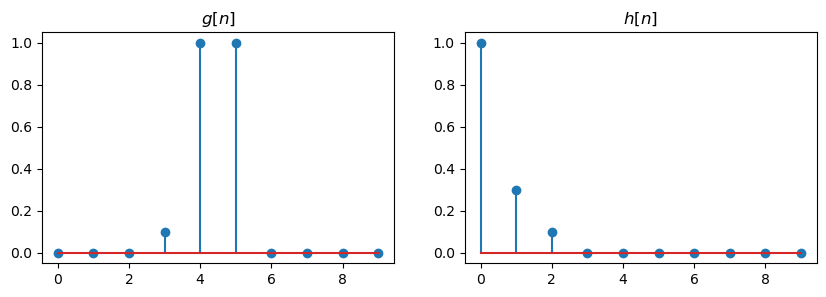

In [2]:
g = zeros(10)
g[3:7] = [0.1,1,1,0.0]
h = zeros(10)
h[0:3] = [1,0.3,0.1]
figure(figsize=[10,3])
subplot(121)
stem(g)
title('$g[n]$')
subplot(122)
stem(h)
title('$h[n]$')

In [3]:
r1 = sig.convolve(g, h, mode='full')[0:len(g)]

<StemContainer object of 3 artists>

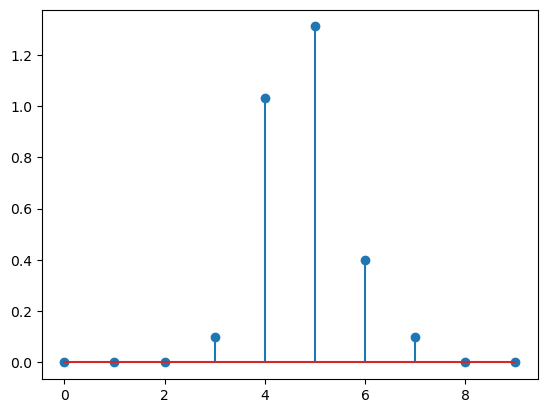

In [4]:
stem(r1)

In [5]:
G = fft.fft(g)
H = fft.fft(h)
R2 = G*H
r2 = fft.ifft(R2)

<StemContainer object of 3 artists>

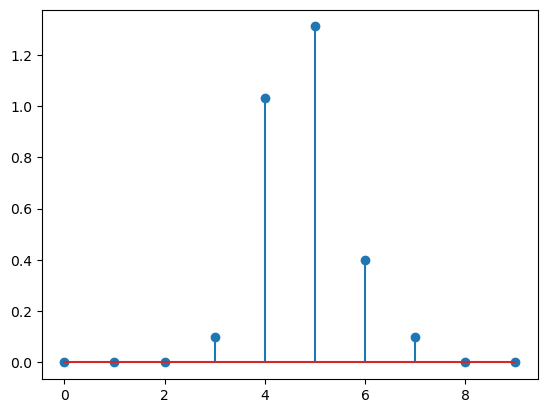

In [6]:
stem(real(r2))

In [7]:
MSE= average((real(r1)-real(r2))**2)
print(f'MSE: {MSE:.5f}')

MSE: 0.00000


In [ ]:
r1==r2

## Experiment II
### Setup

In [659]:
sr = 8000
T = 1
N = sr*T
ns = arange(N)
t = ns/sr

### Defgine $g$ and $h$

In [660]:
f1 = 150
g = sin(2*pi*f1*t)
f2 = 400
h = sin(2*pi*f2*t)

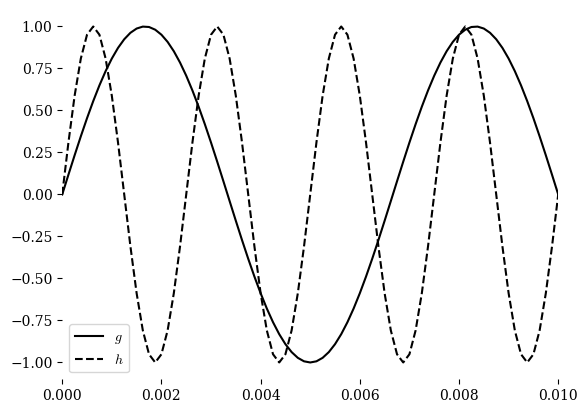

In [661]:
plot(t, g, label='$g$')
plot(t, h, label='$h$')
xlim([0, 0.01])
legend()

### Do a standard Amplitude Modulation (AM)
$$r_1[n] = h[n] \cdot g[n]$$

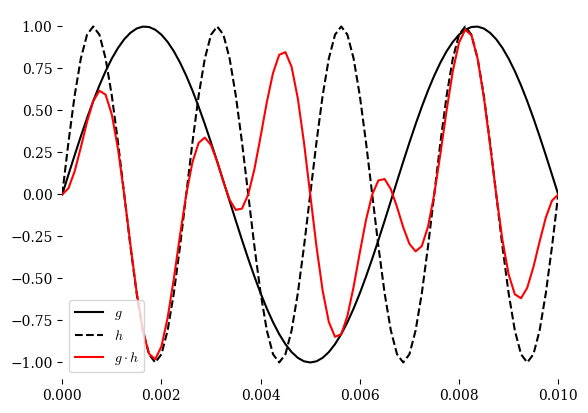

In [662]:
r1 = h*g
plot(t, g, label='$g$')
plot(t, h, label='$h$')
plot(t, r1, label='$g \cdot h$')
xlim([0, 0.01])
legend()

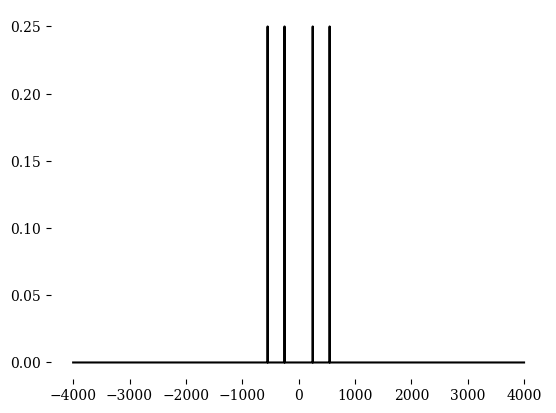

In [663]:
R1 = fft.fft(r1,norm='forward')
R1 = fft.fftshift(R1)
faxis = fft.fftfreq(len(R1), d=1/sr)
faxis = fft.fftshift(faxis)

plot(faxis, abs(R1))


### Now try to achieve the same via Convolution of the Spectra

#### Get the spectra
$$ G(f) = \mathcal{F}\{g[n]\}$$
$$ H(f) = \mathcal{F}\{h[n]\}$$

In [664]:
G = fft.fft(g, norm='forward')
H = fft.fft(h, norm='forward')
G = fft.fftshift(G)
H = fft.fftshift(H)
faxis = fft.fftfreq(len(H), d=1/sr)
faxis = fft.fftshift(faxis)

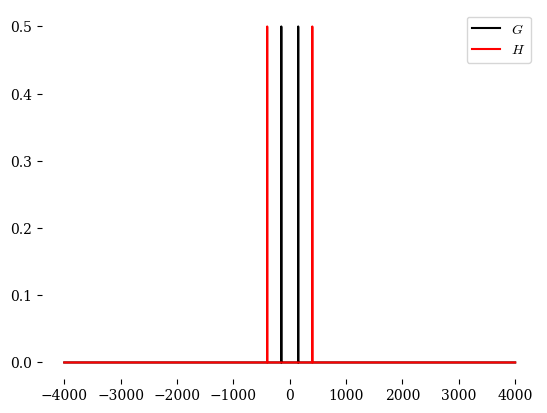

In [665]:
plot(faxis,abs(G), label='$G$')
plot(faxis, abs(H), 'r-',label='$H$')
legend()

#### Convolution
$$R_2(f) = G(f) * H(f)$$


In [666]:
import scipy.signal as sig

In [667]:
padding =1
Gp = np.hstack((G, zeros(padding)))
Hp = np.hstack((H, zeros(0)))
R2 = sig.convolve(Gp,H, mode='same', method='direct')#[0:len(H)]
faxis2 = fft.fftfreq(len(R2),d = 1/sr)
faxis2 = fft.fftshift(faxis2)

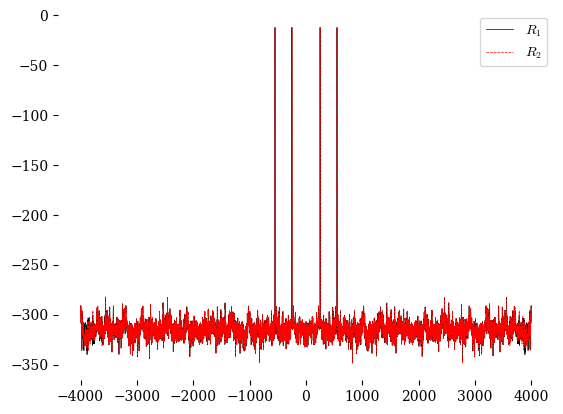

In [668]:
plot(faxis, 20*log10(abs(R1)), label= '$R_1$',lw=0.5)
plot(faxis2, 20*log10(abs(R2)), 'r--', label= '$R_2$', lw=0.5)
legend();
# xlim([0,1000])

#### Get $r_2[n]$ from $R_2(f)$
$$r_2[n] = \mathcal{F}^{-1}\{R_2(f)\}$$

In [669]:
r2 = real(fft.ifft(fft.fftshift(R2), norm='forward'))[0:-1]

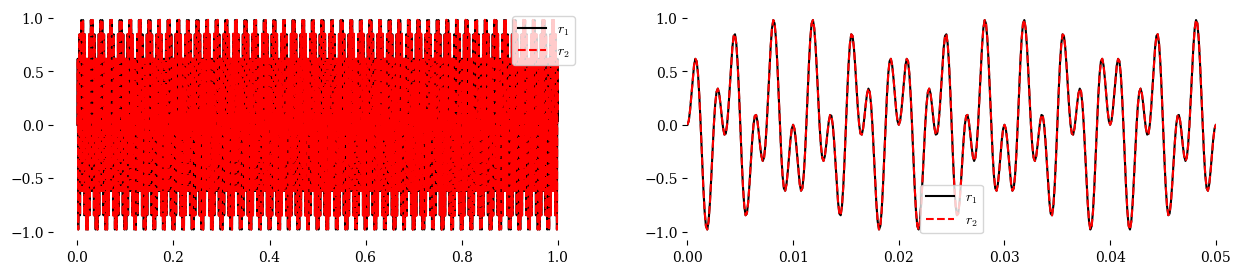

In [670]:
figure(figsize=[15,3])
subplot(121)
plot(t, r1, label='$r_1$')
plot(t, r2, 'r--', label='$r_2$')
legend();
subplot(122)
plot(t, r1, label='$r_1$')
plot(t, r2, 'r--', label='$r_2$')
xlim([0, 0.05])
legend();

In [671]:
MSE= average((real(r1)-real(r2))**2)
print(f'MSE: {MSE:.5f}')

MSE: 0.00931


In [672]:
from IPython.display import Audio

In [673]:
Audio(r1, rate=sr)

In [674]:
Audio(r2, rate=sr)